## task 02
Design your own testing functions

选择Rosenbrock函数作为测试函数, 在(1, 1)处取到最小值

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import matplotlib.pyplot as plt
import numdifftools as nd
import numpy as np
from numpy.linalg import norm, inv, cholesky,LinAlgError

def testfunction(x): 
    return (1-x[0])**2 + 100*(x[0]-x[1])**2
# return (1-x[0])**2 + 105.*(x[1]-x[0]**2)**2
def qs(s,f,g,G): 
    return f + np.dot(g,s) + 0.5*np.dot(np.dot(s,G),s)

## task 01
Implement the Levenberg-Marquardt method

the optimal point [1.00001002 1.00001007]


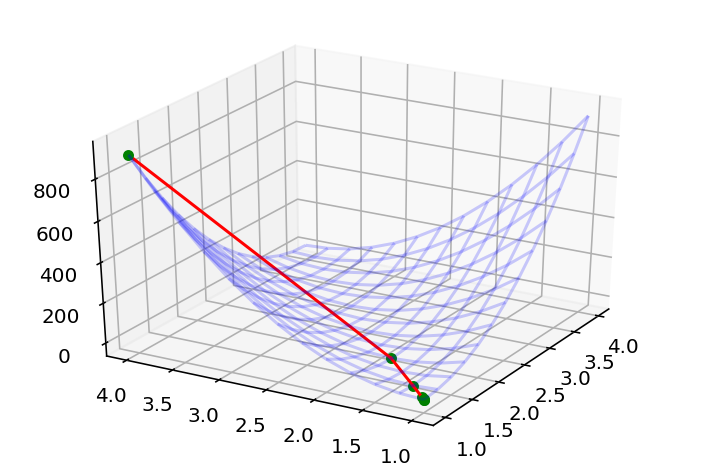

In [3]:
color_char = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

mu = 1;
x = [1,4];

g = nd.Gradient(testfunction)(x)
G = nd.Hessian(testfunction)(x)
f = testfunction(x)
q = qs(np.zeros(np.size(x)),f,g,G)
epsilon = 1e-04
iteration = 0

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(1, 4.1, 0.25)
Y = np.arange(1, 4.1, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.empty(X.shape)
for i in range(np.size(X,0)):
    for j in range(np.size(X,1)):
        Z[i,j] = testfunction([X[i,j],Y[i,j]])
# Plot the surface.
surf = ax.plot_wireframe(X, Y, Z,  rstride=1, cstride=1, color=color_char[0], alpha=0.2)
ax.scatter(x[0], x[1], f, c=color_char[1])  # 绘制数据点
while (norm(g) > epsilon and iteration < 100):
    iteration = iteration + 1
    while (True):
        try:      
            G_mu = G + mu*np.eye(np.size(x))
            L = cholesky(G_mu)
            break
        except LinAlgError as err:
            mu = 4*mu
    s = -np.dot(inv(G_mu),g)
    q_p = q
    q = qs(s,f,g,G)
    f_p = f
    f = testfunction(x + s)
    r = (f - f_p)/(q - q_p)    
    if r < 0.25:
        mu = 4*mu
    elif r > 0.75:
        mu = 0.5*mu
    x_p = x
    if r > 0:
        x = x + s
    else:
        x = x
    g = nd.Gradient(testfunction)(x)
    G = nd.Hessian(testfunction)(x)  
    ax.scatter(x[0], x[1], f, c=color_char[1])  # 绘制数据点
    ax.plot([x_p[0], x[0]], [x_p[1], x[1]], [f_p, f],c=color_char[2])  # 绘制数据点
print('the optimal point', x)

# Set rotation angle to 210 degrees
ax.view_init(azim=210)
plt.show()

